## Jupyter Notebook: Big Heatmap

This notebook will fine-tune the big heatmap.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def sort_columns_by_first_row(df):
    """
    Sorts the columns of a Pandas DataFrame based on the values in the first row.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with columns sorted by the first row's values.
    """
    return df.sort_values('Metric1', ascending=False)

def sort_rows_by_first_column(df):
    """
    Sorts the rows of a Pandas DataFrame based on the values in the first column.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with rows sorted by the first column's values.
    """
    return df.iloc[df.iloc[:, 1].argsort().values]

def dataframe_to_dict(df):
    """
    Converts a Pandas DataFrame into a nested dictionary.
    
    - Outer dictionary keys = metric names (column names).
    - Inner dictionaries = { method_name: value } per metric.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        dict: A dictionary of dictionaries { metric_name: { method_name: value } }.
    """
    
    # Ensure the first column is the method names
    df_numeric = df.copy()
    
    if df_numeric.columns[0].lower() in ["method", "methods"]:
        method_col = df_numeric.iloc[:, 0]  # Store method names
        df_numeric = df_numeric.iloc[:, 1:]  # Remove from main DataFrame
    else:
        method_col = pd.Series(df_numeric.index, name="Method")  # Use index if no method column
    
    # Convert all metric columns to numeric
    df_numeric = df_numeric.apply(pd.to_numeric, errors="coerce")
    
    # Create nested dictionary { metric_name: { method_name: value } }
    nested_dict = {
        metric: dict(zip(method_col, df_numeric[metric])) for metric in df_numeric.columns
    }
    
    return nested_dict

In [25]:
def process_tsv(input_path, output_path):
    """
    Processes a TSV file by calculating a weighted average score for each method,
    sorting the methods by this score, and saving the output in a new TSV file.

    Parameters:
        input_path (str): Path to the input TSV file.
        output_path (str): Path to save the processed TSV file.
    """
    # Load the TSV file
    df = pd.read_csv(input_path, sep="\t", index_col=0)  # Set index as method names

    # Ensure numeric conversion (in case of parsing issues)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Define weights: First 5 metrics get 1.2, last 4 get 1.0
    weights = [1.2] * 5 + [1.0] * 4

    # Compute the weighted average for each method
    df["Weighted_Average"] = (df.iloc[:, :9] * weights).sum(axis=1) / sum(weights)

    # Sort methods based on the weighted average (descending order)
    df_sorted = df.sort_values(by="Weighted_Average", ascending=False)

    # Save the sorted data to a new TSV file
    df_sorted.to_csv(output_path, sep="\t", float_format="%.2f")

    print(f"Processed file saved to: {output_path}")

In [26]:
# Function
def heatmap(data, normalize=False, title="Performance of Methods Across Metrics"):

    # Set method names as index
    df.set_index("Method", inplace=True)
    
    # Normalize values for better visualization (optional)
    df_normalized = df.copy()
    if normalize:
        for col in df.columns:
            df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # Create a figure
    plt.figure(figsize=(12, 14))
    
    # Choose a beautiful colormap
    cmap = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
    
    # Plot heatmap
    sns.heatmap(df_normalized, annot=False, cmap=cmap, linewidths=0.5, linecolor="gray")
    
    # Titles and labels
    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel("Metrics", fontsize=14)
    plt.ylabel("Methods", fontsize=14)
    
    # Improve spacing
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [27]:
# Load the TSV file
file_path = "/Users/egg/Projects/Stainalyzer/notebooks/big_heatmap.tsv"
output_path = "/Users/egg/Projects/Stainalyzer/notebooks/big_heatmap_sorted.tsv"
process_tsv(file_path, output_path)

Processed file saved to: /Users/egg/Projects/Stainalyzer/notebooks/big_heatmap_sorted.tsv


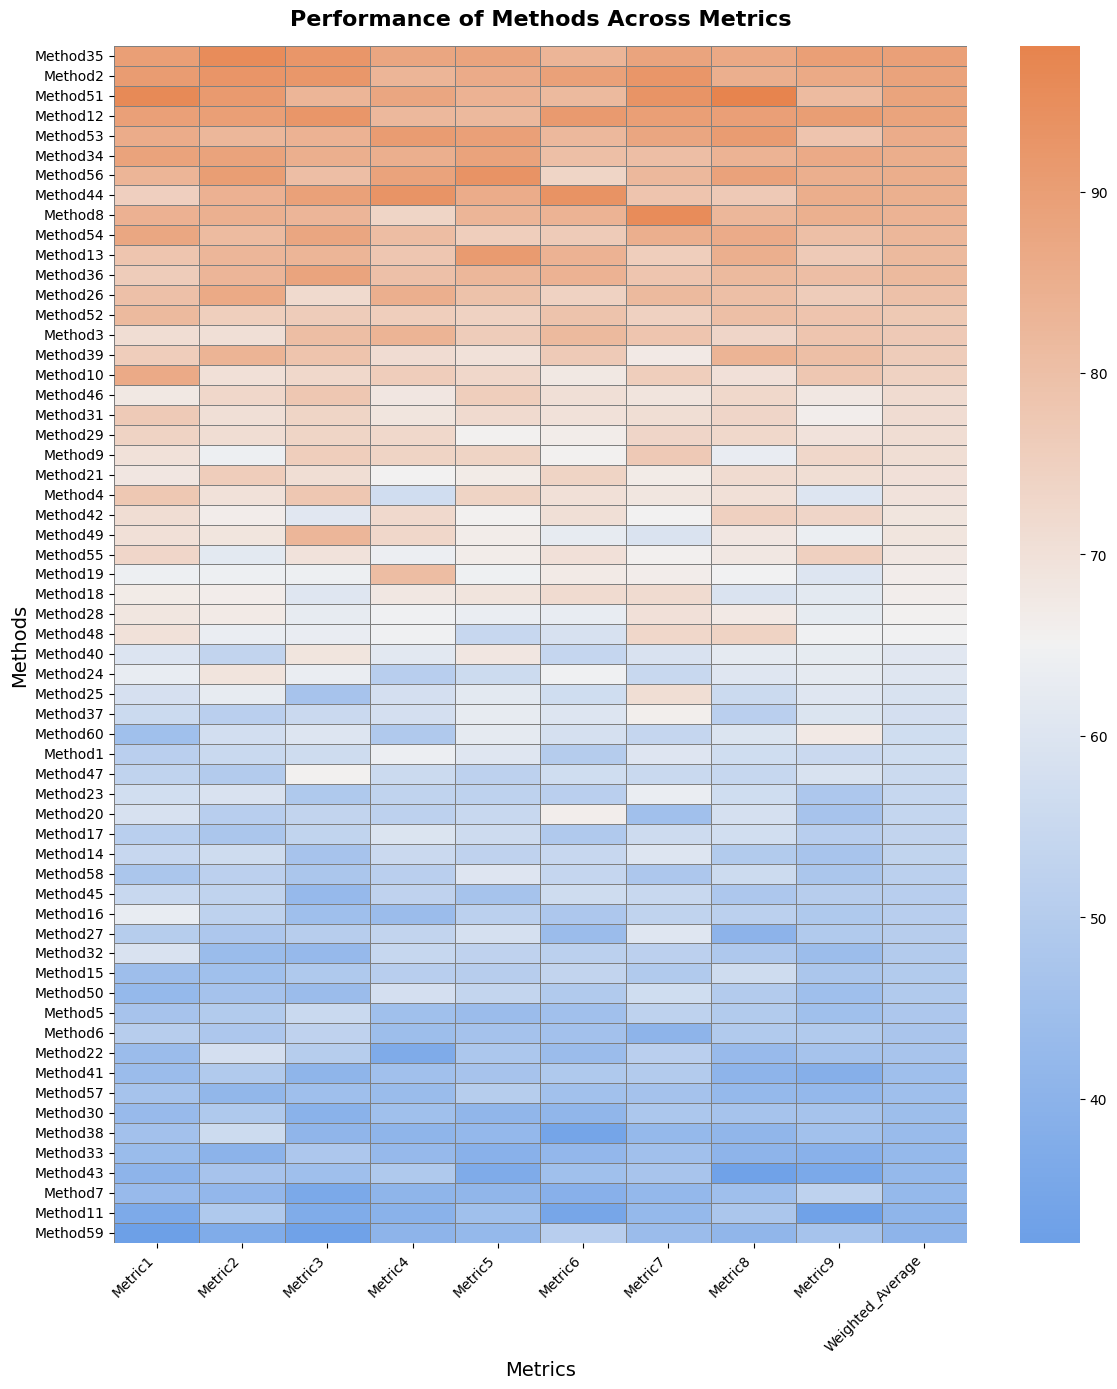

In [28]:
# Load the TSV file
file_path = "/Users/egg/Projects/Stainalyzer/notebooks/big_heatmap_sorted.tsv"
df = pd.read_csv(file_path, sep="\t")
heatmap(df)